In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
automobile_data = pd.read_csv('datasets/automobile_data_processed.csv')

automobile_data.sample(5)

mpg  cylinders  displacement  horsepower  weight  acceleration  age
312  26.4          4         140.0          88    2870          18.1   39
275  16.2          6         163.0         133    3410          15.8   41
223  17.5          6         250.0         110    3520          16.4   42
322  40.8          4          85.0          65    2110          19.2   39
369  36.0          4         105.0          74    1980          15.3   37

In [3]:
automobile_data.shape

(392, 7)

Text(0.5, 1.0, 'Miles per gallon')

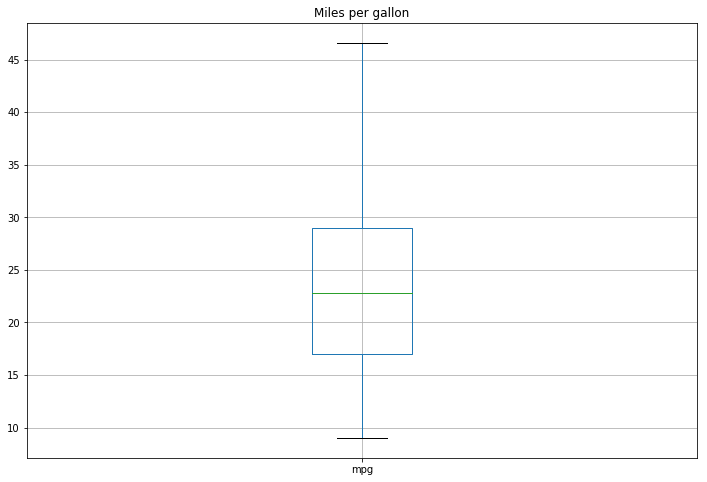

In [4]:
automobile_data.boxplot('mpg', figsize=(12, 8))

plt.title('Miles per gallon')

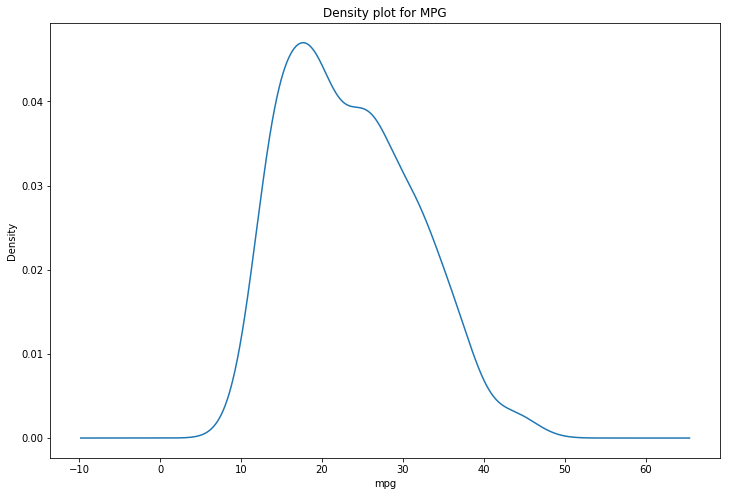

In [5]:
automobile_data['mpg'].plot.kde(figsize=(12, 8))

plt.xlabel('mpg')

plt.title('Density plot for MPG')
plt.show()

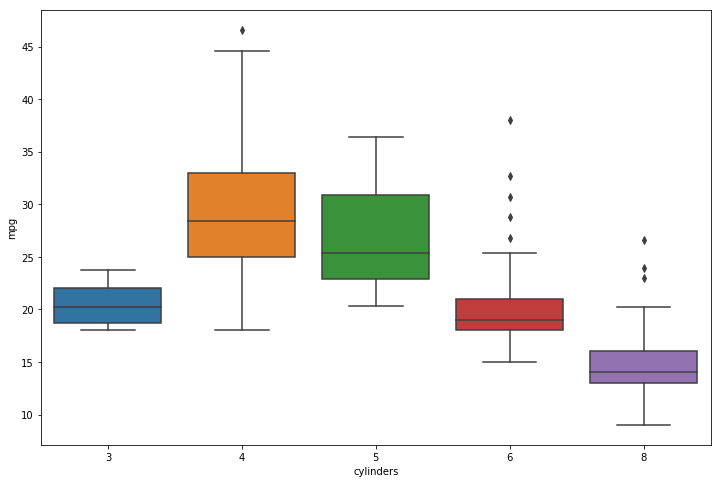

In [6]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='cylinders', y='mpg', data=automobile_data)

plt.show()

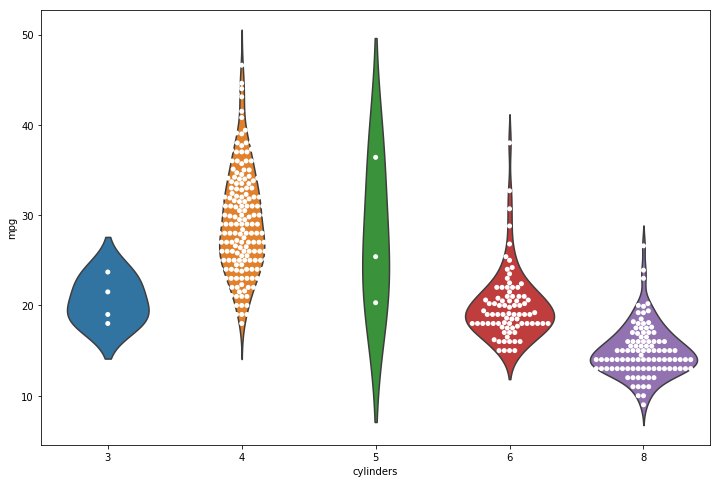

In [7]:
plt.figure(figsize=(12, 8))

sns.violinplot(x='cylinders', y='mpg', data=automobile_data, inner=None)
sns.swarmplot(x='cylinders', y='mpg', data=automobile_data, color='w')

plt.show()

In [8]:
cylinder_stats = automobile_data.groupby(['cylinders'])['mpg'].agg(['mean', 'count', 'std'])

cylinder_stats

mean  count       std
cylinders                            
3          20.550000      4  2.564501
4          29.283920    199  5.670546
5          27.366667      3  8.228204
6          19.973494     83  3.828809
8          14.963107    103  2.836284

In [9]:
ci95_high = []

ci95_low = []

In [10]:
for i in cylinder_stats.index:
    
    mean, count, std = cylinder_stats.loc[i]
    
    ci95_high.append(mean + 1.96 * (std / math.sqrt(count)))
    ci95_low.append(mean - 1.96 * (std / math.sqrt(count)))

In [11]:
cylinder_stats['ci95_HIGH'] = ci95_high
cylinder_stats['ci95_LOW'] = ci95_low

cylinder_stats

mean  count       std  ci95_HIGH   ci95_LOW
cylinders                                                  
3          20.550000      4  2.564501  23.063211  18.036789
4          29.283920    199  5.670546  30.071789  28.496050
5          27.366667      3  8.228204  36.677755  18.055578
6          19.973494     83  3.828809  20.797216  19.149772
8          14.963107    103  2.836284  15.510863  14.415351

In [12]:
cylinders = 4

cylinders4_df = automobile_data.loc[automobile_data['cylinders'] == cylinders]

cylinders4_df.sample(10)

mpg  cylinders  displacement  horsepower  weight  acceleration  age
184  27.0          4         101.0          83    2202          15.3   43
320  46.6          4          86.0          65    2110          17.9   39
324  43.4          4          90.0          48    2335          23.7   39
353  31.6          4         120.0          74    2635          18.3   38
175  23.0          4         115.0          95    2694          15.0   44
345  34.1          4          91.0          68    1985          16.0   38
101  26.0          4          97.0          46    1950          21.0   46
194  24.5          4          98.0          60    2164          22.1   43
147  24.0          4         120.0          97    2489          15.0   45
367  27.0          4         151.0          90    2735          18.0   37

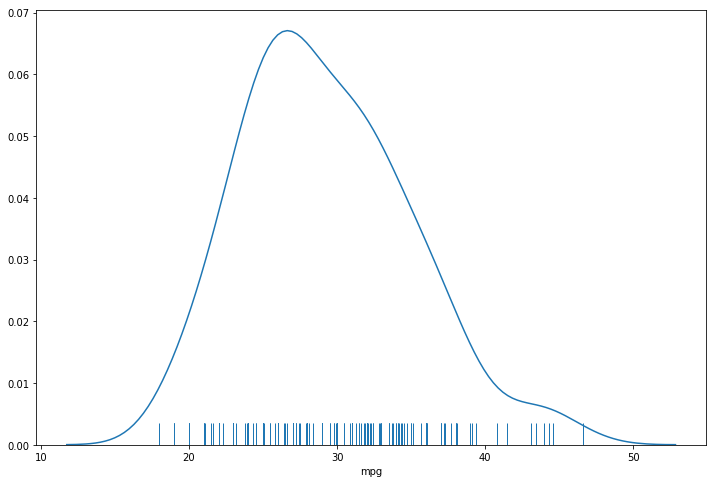

In [13]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders4_df['mpg'], rug=True, kde=True, hist=False)

plt.show()

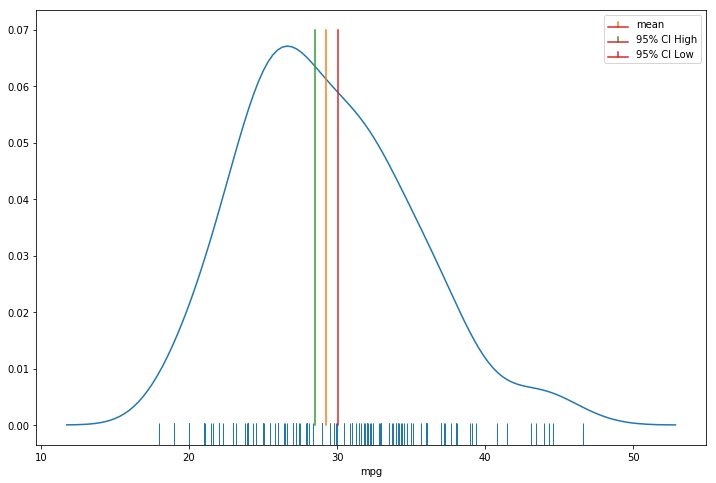

In [14]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders4_df['mpg'], rug=True, kde=True, hist=False)

plt.stem([cylinder_stats.loc[cylinders]['mean']], 
         [0.07], linefmt = 'C1', 
         markerfmt = 'C1', label = 'mean')

plt.stem([cylinder_stats.loc[cylinders]['ci95_LOW']], 
         [0.07], linefmt = 'C2', 
         markerfmt = 'C2', label = '95% CI High')

plt.stem([cylinder_stats.loc[cylinders]['ci95_HIGH']], 
         [0.07], linefmt = 'C3', 
         markerfmt = 'C3', label = '95% CI Low')

plt.xlabel('mpg')
plt.legend()
plt.show()

In [15]:
cylinders = 6

cylinders6_df = automobile_data.loc[automobile_data['cylinders'] == cylinders]

cylinders6_df.sample(10)

mpg  cylinders  displacement  horsepower  weight  acceleration  age
153  15.0          6         250.0          72    3158          19.5   44
250  19.2          6         231.0         105    3535          19.2   41
200  17.5          6         258.0          95    3193          17.8   43
46   19.0          6         250.0         100    3282          15.0   48
112  21.0          6         155.0         107    2472          14.0   46
282  20.6          6         225.0         110    3360          16.6   40
15   22.0          6         198.0          95    2833          15.5   49
192  22.5          6         232.0          90    3085          17.6   43
190  22.0          6         250.0         105    3353          14.5   43
126  15.0          6         250.0         100    3336          17.0   45

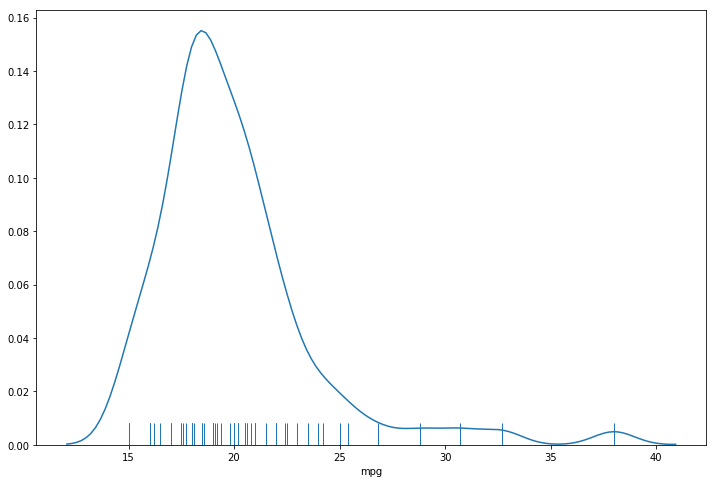

In [16]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders6_df['mpg'], rug=True, kde=True, hist=False)

plt.show()

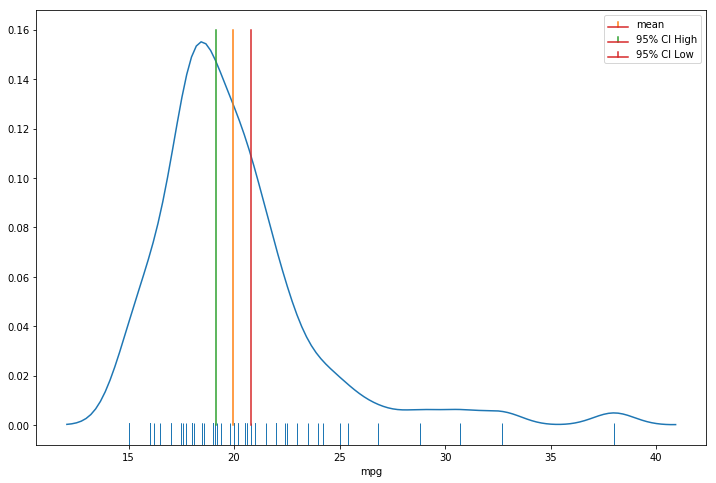

In [17]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders6_df['mpg'], rug=True, kde=True, hist=False)

plt.stem([cylinder_stats.loc[cylinders]['mean']], 
         [0.16], linefmt = 'C1', 
         markerfmt = 'C1', label = 'mean')

plt.stem([cylinder_stats.loc[cylinders]['ci95_LOW']], 
         [0.16], linefmt = 'C2', 
         markerfmt = 'C2', label = '95% CI High')

plt.stem([cylinder_stats.loc[cylinders]['ci95_HIGH']], 
         [0.16], linefmt = 'C3', 
         markerfmt = 'C3', label = '95% CI Low')

plt.xlabel('mpg')
plt.legend()
plt.show()